## Preprocess raw Stack Exchange data and save to local

Download from:
https://archive.org/details/stackexchange

- comes in *.tar.7z
- you can download 7zip from their downloads page for linux
- you can unzip using bzip2
- you can run 7z binary, for example: `p7zip_16.02/bin/7z e philosophy.stackexchange.com.7z`

In [1]:
ls

 Volume in drive C is DeepRig main drive
 Volume Serial Number is C6E6-9713

 Directory of C:\Users\paule\code\machine_learning_implementations\question_filter_network\notebooks

11/03/2018  02:17 PM    <DIR>          .
11/03/2018  02:17 PM    <DIR>          ..
11/02/2018  11:42 PM    <DIR>          .ipynb_checkpoints
10/28/2018  11:57 PM            78,361 DataExplorer.ipynb
11/03/2018  01:08 AM            20,426 Eager_model_notebook.ipynb
10/20/2018  01:18 PM               723 Eager_notebook.py
10/28/2018  10:10 AM            14,397 Normal_model_notebook.ipynb
10/20/2018  01:18 PM             8,249 Normal_model_notebook.py
11/01/2018  08:29 PM            13,031 Prediction_test_notebook.ipynb
10/20/2018  01:18 PM            10,046 Question_extraction.py
10/20/2018  01:18 PM             1,984 Question_extraction-Attention1.py
11/03/2018  02:17 PM           118,289 stack_exchange_data_extraction.ipynb
10/20/2018  01:18 PM             1,656 stack_exchange_data_extraction.py
              

In [2]:
cd ../data

C:\Users\paule\code\machine_learning_implementations\question_filter_network\data


In [3]:
import os
import warnings
from random import shuffle
import xml.etree.ElementTree as ET
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

from backend.parse_stack_exchange import (parse_xml_doc,
                                          remove_html,
                                          strip_and_lower,
                                          process_text,
                                          write_data)

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
xmls = {'Badges.xml': None,
        'Comments.xml': 'Text',
        'PostHistory.xml': None,
        'PostLinks.xml': None,
        'Posts.xml': 'Title',
        'Tags.xml': None,
        'Users.xml': None,
        'Votes.xml': None}
stack_dir = os.path.join('.', 'stack_exchange')
stack_list= ['monero.stackexchange.com',
             'movies.stackexchange.com',
             'philosophy.stackexchange.com',
             'politics.stackexchange.com']

# Data Exploration

## Philosophy

#### POSTS

In [5]:
def parse_xml_doc(file_path, attribute_name='Text'):
    " return a list of all the text sentences from xml "
    tree = ET.parse(file_path)
    root = tree.getroot()
    texts = list()
    count = 0
    for child in root:
        try:
            texts.append(child.attrib[attribute_name])
            count += 1
        except:
            pass
    return texts, count

In [6]:
posts_path = os.path.join(stack_dir, stack_list[2],'Posts.xml')
posts_path

'.\\stack_exchange\\philosophy.stackexchange.com\\Posts.xml'

In [7]:
post_titles, num_titles = parse_xml_doc(posts_path, 'Title')
post_bodies, num_bodies = parse_xml_doc(posts_path, 'Body')  # needs html removed first

In [8]:
post_bodies[:3]

['<p>What would it mean to say that mathematics was invented and how would this be different from saying mathematics was discovered? </p>\n\n<p>Is this even a serious philosophical question or just a meaningless/tautological linguistic ambiguity?</p>\n',
 '<p><a href="http://area51.stackexchange.com/proposals/2578/philosophy/7211#7211">One of our definition questions</a> particularly intrigued me.</p>\n\n<p>If a man were committing suicide by jumping off a building and you shot him on the way down, killing him, are you culpable for his death?</p>\n\n<p>Legally you may or may not be, depending on the jurisdiction.  But what would the philosophical underpinnings of such a law be?  It could be viewed as a mercy killing, in a way, but is it distinct from assisted suicide (and how)?  What else is there to consider?</p>\n\n<p><strong>Edit:</strong> Assume the man would die on impact. "Well he might live" gets too far away from the intended discussion.</p>\n',
 '<p>"<a href="http://en.wikiped

In [9]:
num_titles, num_bodies

(10974, 37602)

In [36]:
preprocessed_titles = [remove_html(x) for x in post_titles]
stripped_and_lowered_titles = [strip_and_lower(x) for x in preprocessed_titles]
prepard_question_titles = process_text(stripped_and_lowered_titles, get_questions=True)
prepard_non_question_titles = process_text(stripped_and_lowered_titles, get_questions=False)

c:\users\paule\code\machine_learning_implementations\question_filter_network\backend\parse_stack_exchange.py:66: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 66 of the file c:\users\paule\code\machine_learning_implementations\question_filter_network\backend\parse_stack_exchange.py. To get rid of this warning, pass the additional argument 'features="html5lib"' to the BeautifulSoup constructor.

  text = BeautifulSoup(text).get_text()


In [44]:
prepard_question_titles[:5]

['was mathematics invented or discovered',
 'if you kill someone who is committing suicide are you culpable for his death',
 'is atheism a requirement for a consistent existentialist philosophy',
 'if we value free agency how can punishment the states deprivation of a persons free agency be justified',
 'whats the difference between randian philosophy and objectivism']

In [43]:
prepard_non_question_titles[:5]

['a reference for understanding current trends in epistemology',
 'resolution of the contradictory definitions of lawful and chaotic in dungeons and dragons',
 'resolving weighting conflicts in preference utilitarianism',
 'gods paradoxes and their implications',
 'existence of an intelligible physical world beyond the mind']

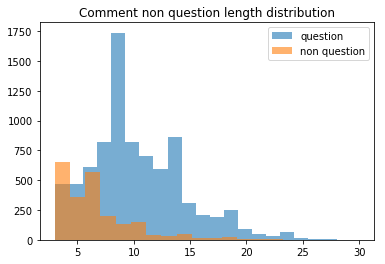

In [40]:
title_question_length_dist = [len(x.split()) for x in prepard_question_titles]
plt.hist(title_question_length_dist, bins=20, alpha=0.6, label='question');
plt.title("Comment length distribution");

title_non_question_length_dist = [len(x.split()) for x in prepard_non_question_titles]
plt.hist(title_non_question_length_dist, bins=20, alpha=0.6, label='non question');
plt.title('Comment non question length distribution');
plt.legend();

In [32]:
sorted(prepard_question_titles[:500], key=lambda x: len(x.split()))[:25]

['what is philosophy',
 'what is postmodernism',
 'did kuhn recant',
 'motivations for dialetheism',
 'is perfection conceivable',
 'or does he',
 'does time exist',
 'bookspiecesessays about selfworth',
 'in computer science',
 'is philosophy formalisable',
 'was einstein a philosopher',
 'when is violence appropriate',
 'was rorty a relativist',
 'pantheism panentheism other combinations',
 'is illogical not logical',
 'do traditionalists still exist',
 'what is mathematical existence',
 'are there token events',
 'what is an existentialist',
 'was aristotle an empiricist',
 'was mathematics invented or discovered',
 'arguments foragainst tolerance against intolerance',
 'is a language its dictionary',
 'can something infinite be absolute',
 'does happiness motivate every action']

#### COMMENTS

In [15]:
comment_path = os.path.join(stack_dir, stack_list[2], 'Comments.xml')
comment_path

'.\\stack_exchange\\philosophy.stackexchange.com\\Comments.xml'

In [16]:
comments, num_comments = parse_xml_doc(comment_path, 'Text')
num_comments

97567

In [34]:
preprocessed_comments = [remove_html(x) for x in comments]
stripped_and_lowered_comments = [strip_and_lower(x) for x in preprocessed_comments]

prepard_questions_comments = process_text(stripped_and_lowered_comments, get_questions=True)
prepared_non_questions_comments = process_text(stripped_and_lowered_comments, get_questions=False)

c:\users\paule\code\machine_learning_implementations\question_filter_network\backend\parse_stack_exchange.py:66: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 66 of the file c:\users\paule\code\machine_learning_implementations\question_filter_network\backend\parse_stack_exchange.py. To get rid of this warning, pass the additional argument 'features="html5lib"' to the BeautifulSoup constructor.

  text = BeautifulSoup(text).get_text()


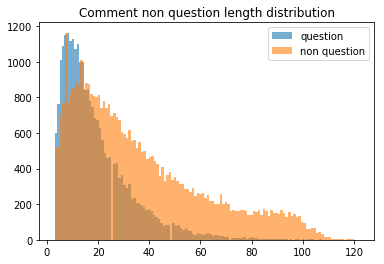

In [35]:
comment_question_length_dist = [len(x.split()) for x in prepard_questions_comments]
comment_non_question_length_dist = [len(x.split()) for x in prepared_non_questions_comments]

plt.hist(comment_question_length_dist, bins=120, alpha=0.6, label='question');
plt.title("Comment length distribution");

plt.hist(comment_non_question_length_dist, bins=120, alpha=0.6, label='non question');
plt.title('Comment non question length distribution');
plt.legend();

### Data collection

In [45]:
prepard_question_titles[:10]

['was mathematics invented or discovered',
 'if you kill someone who is committing suicide are you culpable for his death',
 'is atheism a requirement for a consistent existentialist philosophy',
 'if we value free agency how can punishment the states deprivation of a persons free agency be justified',
 'whats the difference between randian philosophy and objectivism',
 'what is the difference between necessary and sufficient',
 'how does one know one is not dreaming',
 'what is philosophy',
 'which philosophy forces others to act altruistically',
 'what are the main points of criticism of the ancient stoic school visavis the system of philosophy of the epicureans']

In [46]:
prepard_questions_comments[:10]

['is this implying that by virtue of a government giving agency to a person it is culpable for the actions of said person',
 'what of the argument that youre culpable for shooting him but his death was already determined and thus you cant be culpable for it',
 'if we say that ending it 5 seconds earlier does not count then what about 10 seconds a minute a day a year',
 'but why does speeding up death make you culpable and is there really no difference between a split second and hours',
 'of course are you telling me that doctors are allowed to ease someone into death by initiating a morphine drip ensuring that they die a peaceful painless death',
 'could you provide a synopsis showing the actual contrasting areas',
 'yes the underlying issue is is killing someone who is about to die really killing is it murder right',
 'ok i try again i also add if a mathematical discovery hasnt yet been discovered does it exist really no',
 'how is this a philosophical question',
 'why do you think it

In [47]:
prepared_non_questions_comments[:10]

['emansipater i am not an expert on this topic all i can refer to is probably wiki which i have now added',
 'topics in advanced number theory noneuclidean geometry kolmogorov complexity and many other branches of mathematics were certainly not invented as a way to deal with concrete things in a more practical manner',
 'from that i can see that objectivism was not originated by rand but it doesnt really answer my question and its better to post answers with content rather than links',
 'good enough for my upvotei just want readers to realise these are specific schools of thought with defined characteristics',
 'im sure its assumed to be a skyscraper you and emansipater are saying the same thing essentially',
 'ive edited the question',
 'lennart fair point',
 'the difference between these concepts is important to logical thinking it would be good if someone could offer a nice clear answer to this',
 'not entirely true as it could be proven that something exists cogito ergo sum at leas

In [50]:
len(prepard_question_titles) + len(prepard_questions_comments), len(prepared_non_questions_comments)

(33762, 41076)

In [52]:
all_questions = sorted(prepard_question_titles + prepard_questions_comments, key=lambda x: len(x.split()))
all_non_questions = sorted(prepared_non_questions_comments, key=lambda x: len(x.split()))[:min(len(all_questions), len(prepared_non_questions_comments))]

In [53]:
len(all_questions), len(all_non_questions)

(33762, 33762)

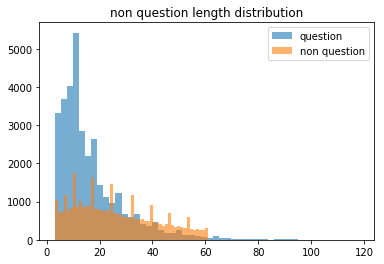

In [56]:
plt.hist([len(x.split()) for x in all_questions], bins=50, alpha=0.6, label='question');
plt.title("Question length distribution");

plt.hist([len(x.split()) for x in all_non_questions], bins=50, alpha=0.6, label='non question');
plt.title('non question length distribution');
plt.legend();

In [60]:
len_filtered_questions = list(
    filter(lambda x: len(x.split()) <= 30, all_questions)
)
len_filtered_non_questions = list(
    filter(lambda x: len(x.split()) <=30, all_non_questions)
)

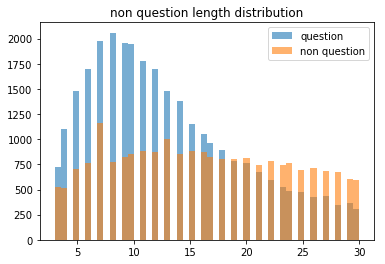

In [61]:
plt.hist([len(x.split()) for x in len_filtered_questions], bins=50, alpha=0.6, label='question');
plt.title("Question length distribution");

plt.hist([len(x.split()) for x in len_filtered_non_questions], bins=50, alpha=0.6, label='non question');
plt.title('non question length distribution');
plt.legend();

In [63]:
len(len_filtered_questions), len(len_filtered_non_questions)  # slightly unbalanced

(29526, 21728)

In [64]:
shuffle(len_filtered_questions)
shuffle(len_filtered_non_questions)

In [ ]:
# equalize list lengths
non_questions = non_questions[:len(questions)]

In [65]:
write_data(len_filtered_questions, len_filtered_non_questions)